/home/rabiranjan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/rabiranjan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/rabiranjan/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


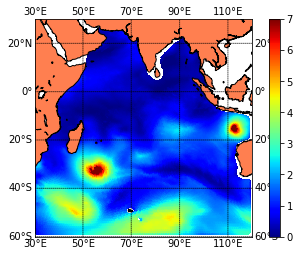

Hsig_20180321_000000


In [60]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import datetime
import pandas as pd
from dateutil.parser import parse
#import matplotlib as mpl
#from pylab import  *
import numpy as np
from scipy.spatial import Delaunay
import mpl_toolkits.mplot3d.axes3d
from datetime import timedelta
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from mpl_toolkits.basemap import Basemap
#from cycler import cycler
#from  matplotlib import animation


datamat=loadmat('junk.mat')
Xp=datamat['Xp']
Yp=datamat['Yp']
strt =datetime.datetime(2018,3,21,0,0)
end=datetime.datetime(2018,3,23,0,0)
numdays = 3
def perdelta(strt,end,delta):
    curr=strt
    while curr<end:
        yield curr
        curr+=delta

#Read element file
#data = pd.read_table('fort.ele',delim_whitespace=True,names=('A','B','C','D'))
tri_new = pd.read_table('fort.ele',delim_whitespace=True,names=('A','B','C','D'),usecols=[1,2,3],skiprows=1,dtype={'D':np.int})
#data1=data[['B','C','D']]
#tri=data1[1:]
dateList = []
for result in perdelta(strt,strt+timedelta(days=3),timedelta(hours=3)):
    dat=result
    #print(result)
    dt =parse(str(dat))
    y=dt.year
    mn=dt.month
    d=dt.day
    hr=dt.hour
    mi=dt.minute
    #print(y,mn,d,hr,mi)
    if  hr<10:
       # d='0'+str(d)
        hr='0'+str(hr)
    else:
        d=str(d)
        hr=str(hr)
    varname='Hsig_'+str(y)+'0'+str(mn)+str(d)+'_'+hr+'0000'
    x=Xp.flatten()
    y=Yp.flatten()
    z=datamat[varname]
    z=z.flatten()
    map = Basemap(llcrnrlon=30, llcrnrlat=-60, urcrnrlon=120, urcrnrlat=30,resolution='l')
    map.drawcoastlines()
    map.fillcontinents(color='coral')
    tri_sub = tri_new.apply(lambda x:x-1)
    triang=mtri.Triangulation(x,y,triangles=tri_sub)
    pp=plt.tripcolor(triang,z,cmap='jet',vmin=0,vmax=7)
    map.drawmeridians(np.arange(30,120,20),labels=np.arange(30,120,20))
    map.drawparallels(np.arange(-60,25,20),labels=np.arange(-60,25,20))
    plt.colorbar(pp,cmap='jet')
    plt.show()
    print(varname)
    break